In [1]:
import scipy

In [1]:
from spt3g import core
import matplotlib.pyplot as plt
import numpy as np


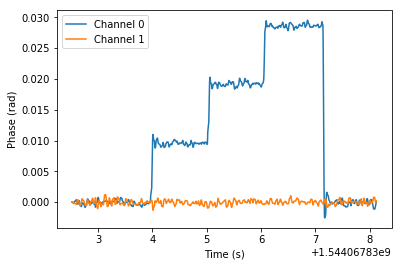

In [9]:
file = core.G3File("step.g3")
s = core.G3Units.s

ts = []
ts1 = []
timestamps = []

for frame in file:
    x = frame["filtered"]["0"]
    ts.append(frame["filtered"]["0"])
    ts1.append(frame["filtered"]["1"])
    timestamps.append(np.linspace(x.start.time / s, x.stop.time/s, x.n_samples))


t0 = timestamps[0][0]
plt.plot(np.concatenate(timestamps),np.concatenate(ts) / 1218, color='C0', label = "Channel 0")
plt.plot(np.concatenate(timestamps),np.concatenate(ts1) / 1218, color='C1', label = "Channel 1")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Phase (rad)")

plt.show()

In [33]:
file = core.G3File("comparison.g3")
s = core.G3Units.s

ts_uf = []
ts_f = []
timestamps = []

for frame in file:
    x = frame["filtered"]["0"]
    ts_f.append(x)
    timestamps.append(np.linspace(x.start.time/s, x.stop.time/s, x.n_samples))
    x = frame["unfiltered"]["0"]
    ts_uf.append(x)


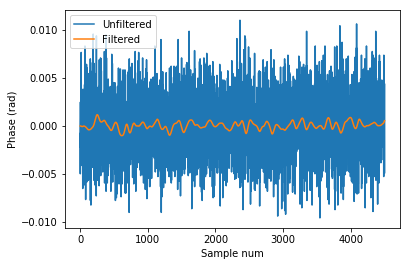

In [34]:
plt.plot(np.concatenate(ts_uf), label = "Unfiltered")
plt.plot(np.concatenate(ts_f) / 1218, label = "Filtered")
plt.legend()
plt.xlabel("Sample num")
plt.ylabel("Phase (rad)")
plt.show()

Text(0,0.5,'Filtered PSD / unfiltered PSD')

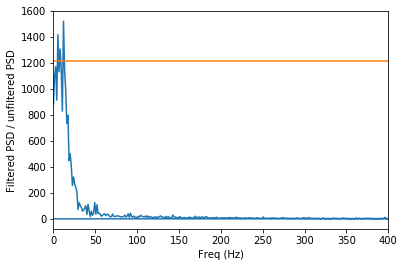

In [40]:
# Calculates FFT's

fs_uf = np.array([abs(np.fft.fft(x))**2 for x in ts_uf])
fs_f = np.array([abs(np.fft.fft(x))**2 for x in ts_f])

f_uf = np.sqrt(sum(fs_uf) / len(fs_uf))
f_f = np.sqrt(sum(fs_f) / len(fs_f))

xs = np.fft.fftfreq(len(f_f), d=1/ts_f[0].sample_rate / core.G3Units.s)

plt.plot(xs, f_f/f_uf)
plt.axhline(y = 1218, color="C1")
plt.xlim(0, 400)
plt.xlabel("Freq (Hz)")
plt.ylabel("Filtered PSD / unfiltered PSD")

(1544062392.673354, 1544062392.9255896)

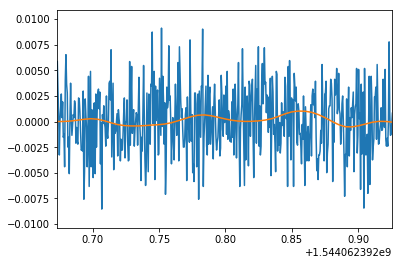

In [55]:
plt.plot(timestamps["uf"][0], ts["uf"][0])
plt.plot(timestamps["f"][0], ts["f"][0] / 1218)
plt.xlim(timestamps['f'][0][0], timestamps['f'][0][50])

# plt.plot(ts["f"][0][:200]/1218 )

(0, 400)

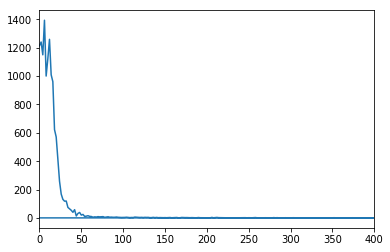

In [59]:
# Calculates FFT's

fs = []
fs.append(np.array([abs(np.fft.fft(x))**2 for x in ts["uf"]]))
fs.append(np.array([abs(np.fft.fft(x))**2 for x in ts["f"]]))

f0 = np.sqrt(sum(fs[0]) / len(fs[0]))
f1 = np.sqrt(sum(fs[1]) / len(fs[1])) 

xs = np.fft.fftfreq(len(f0), d=1/2000)



# plt.plot(xs, f0)
plt.plot(xs, f1/f0)
plt.xlim(0, 400)
# fs = [np.fft.fft(x) for x in ts]

# # sample_rate = ts[0].sample_rate * core.G3Units.s
# xs = np.fft.fftfreq(len(ts[0]), d=1/2000)

# mask = (xs > 0) * (xs < 1000)
# # plt.plot(xs[mask], abs(fs[0][mask]))
# plt.plot(xs[mask], abs(fs[1][mask]/fs[0][mask]))
# # plt.plot(xs[m, np.abs(fs[0])**2)
# # plt.xlim(0, 400)
# plt.show()



In [6]:
print(xs)

[   0.            1.99827176    3.99654353    5.99481529    7.99308706
    9.99135882   11.98963059   13.98790235   15.98617412   17.98444588
   19.98271765   21.98098941   23.97926118   25.97753294   27.97580471
   29.97407647   31.97234824   33.97062      35.96889177   37.96716353
   39.9654353    41.96370706   43.96197883   45.96025059   47.95852236
   49.95679412   51.95506589   53.95333765   55.95160942   57.94988118
   59.94815295   61.94642471   63.94469648   65.94296824   67.94124001
   69.93951177   71.93778354   73.9360553    75.93432707   77.93259883
   79.9308706    81.92914236   83.92741413   85.92568589   87.92395766
   89.92222942   91.92050119   93.91877295   95.91704472   97.91531648
   99.91358825  101.91186001  103.91013178  105.90840354  107.90667531
  109.90494707  111.90321884  113.9014906   115.89976237  117.89803413
  119.8963059   121.89457766  123.89284943  125.89112119  127.88939296
  129.88766472  131.88593649  133.88420825  135.88248002  137.88075178
  139.

In [ ]:
from scipy import signal